Check for missing data, extreme values, outliers. 

Usual suspects when you look at values: the appearance of groups, skewness, appearance of unexpected values, where are the data values centered and how widely are values separated. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#import dataframe from csv file
df = pd.read_csv('data/eda_housing_market.csv')


In [2]:
# check for missing data
df.isnull().sum()

house_id            0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [3]:
# the columns with missing data are: waterfront, view, yr_renovated, sqft_basement
# how many values are missing in each column in percentage
df.isnull().sum()/len(df)*100

house_id          0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.070982
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     2.092883
yr_built          0.000000
yr_renovated     17.817289
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

In [4]:
# convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# extract the year in order to calcuate the age of the house.
df['year_sold'] = pd.to_datetime(df['date']).dt.year
df['age_house'] = df['year_sold'] - df['yr_built']

In [5]:
df.head()

,house_id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,age_house
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014,59
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014,63
2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015,82
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014,49
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015,28


In [6]:

# drop the `id`, becasue it is not useful for our analysis
df.drop(['house_id'], axis = 1, inplace = True)

In [7]:
# calculate the years from renovation to sold. if no reno happened, then consider the built year as first renovation year
df['age_renovated'] = df['date'].dt.year - df['yr_renovated'].where(df['yr_renovated'] != 0, df['yr_built'])
# we want to know if the house have renovation (True/False)
df['done_reno'] = (df['yr_renovated'] != 0).astype(int)

# see unique values of age_built and age_renovated
print(df['age_house'].unique())

df[['date', 'yr_renovated', 'yr_built', 'age_house', 'age_renovated', 'done_reno']].head(100)
df['yr_renovated'].value_counts().head(10)





[ 59  63  82  49  28  13  19  52  55  12  50  72  87  37 115  36  20  98
  93  46  67  29  73  99 105  66  10  11   9  85  33  84  81 110  18  14
  30   0  92  62  64  34  88   6  24  60  41  35  89  25  43  58  74  22
  51  53   8  26  75  68  48  39 104  31 114   4  69  65  90  27 101  47
  54 109   7  61  15  38  16 113  21  94  45 100 111  96  97  86 103  78
  77  76 107  40  57 102  17  71   1  23  91  42  95   2  32   3  56  70
  44 112   5  80  83 106 108  79  -1]


yr_renovated
0.0        17005
20140.0       73
20130.0       31
20030.0       31
20070.0       30
20000.0       29
20050.0       29
20040.0       22
19900.0       22
20090.0       21
Name: count, dtype: int64

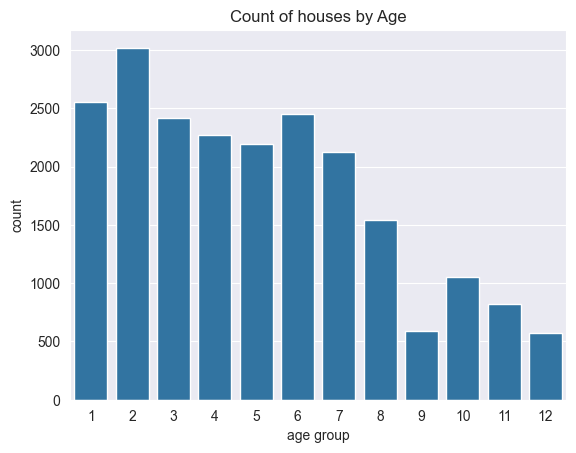

In [8]:
# see the distrobution of age_house


# bin the age into 12 equal-width bins with integer labels
df['age_house_binned'] = pd.cut(df['age_house'], bins=12, labels=range(1, 13), include_lowest=True)

# set the style of the plot
sns.set_style('darkgrid')

# create a count plot of house by age
sns.countplot(x='age_house_binned', data=df, color='#1f77b4')

# add a title and axis labels
plt.title('Count of houses by Age')
plt.xlabel('age group')
plt.ylabel('count')

# show the plot
plt.show()



In [9]:
# store dataframe
%store df

Stored 'df' (DataFrame)
